<a href="https://colab.research.google.com/github/noahruiz416/UFC-Fight-Prediction-Application-Model/blob/main/Notebooks/catBoostSamplingMethodsCVFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we will continue with buidling our model and will build on the work done in the feature selection notebook. For reference: 

##### https://github.com/noahruiz416/UFC-Fight-Prediction-Application-Model/blob/main/Notebooks/catBoostFeatureSelection.ipynb

In particular this notebook will try a few different approaches: 
1. Random Undersampling -> Train -> Test
2. Oversampling -> Train -> Test
3. Scaling Model Weights -> Train -> Test
4. Baseline Model for Comparing

Though the nature of UFC fights does tend to favor the red corner (since the 'red' corner usually has the higher ranked fighter). I wanted to see if addressing the class imbalance would alter our model performance

## Dependencies

In [ ]:
#installing shap, catboost and imbalanced-learn, only need to run once, if you have not comment out the #
!pip install shap
!pip install catboost
!pip install imbalanced-learn

In [ ]:
#ML Libraries
from xgboost import XGBClassifier

#Preprocessing 
from sklearn import preprocessing

#Essential for Data Loading 
import pandas as pd 

#Shapley for feature importance 
import shap

#metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef

#imbalanced learn methods 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

## Training Data Loads for Model 1, 2 and 3

In [ ]:
#loading in our dataframes
model1_x_train = pd.read_csv('X_processed_train.csv', index_col = 0)
model1_y_train = pd.read_csv('y_processed_train.csv', index_col = 0)

model2_x_train = pd.read_csv('X_processed_train.csv', index_col = 0)
model2_y_train = pd.read_csv('y_processed_train.csv', index_col = 0)

model3_x_train = pd.read_csv('X_processed_train.csv', index_col = 0)
model3_y_train = pd.read_csv('y_processed_train.csv', index_col = 0)

model4_x_train = pd.read_csv('X_processed_train.csv', index_col = 0)
model4_y_train = pd.read_csv('y_processed_train.csv', index_col = 0)


#binarizing the y train labels from red, blue -> red = 1, blue = 0
model1_y_train = preprocessing.LabelBinarizer().fit_transform(model1_y_train['Winner'])
model2_y_train = preprocessing.LabelBinarizer().fit_transform(model2_y_train['Winner'])
model3_y_train = preprocessing.LabelBinarizer().fit_transform(model3_y_train['Winner'])
model4_y_train = preprocessing.LabelBinarizer().fit_transform(model4_y_train['Winner'])


#using only the subset of features we selected from our previous notebook 
model1_x_train = model1_x_train[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model2_x_train = model2_x_train[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model3_x_train = model3_x_train[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model4_x_train = model4_x_train[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]


#we will use these cat features for each model we run
cats = ["R_fighter", "B_fighter"]


## Model 1

This approach will follow the following idea, Random Undersampling -> Train -> Test

In [ ]:
#undersampling our dataset and then fitting the model
ros = RandomUnderSampler()
X_res_model1, y_res_model1 = ros.fit_resample(model1_x_train, model1_y_train)

model1 = CatBoostClassifier(cat_features = cats)

model1.fit(X_res_model1, y_res_model1, verbose = False)

## Model 2
This approach will follow the following idea, Oversampling -> Train -> Test

In [ ]:
#utilizing the SMOTE oversampling method
sm = SMOTENC(categorical_features=[4,5])
X_res_model2, y_res_model2 = sm.fit_resample(model2_x_train, model2_y_train)

model2 = CatBoostClassifier(cat_features = cats)

model2.fit(X_res_model2, y_res_model2, verbose = False)

## Model 3
This approach will follow the following idea, Scaling Model Weights -> Train -> Test

We will determine the pos_weight scale as follows: 

Count(negative examples)/ Count(Positive examples)

In [ ]:
pos_scale = abs(((model3_y_train.sum() - len(model3_y_train))/len(model3_y_train)))

model3 = CatBoostClassifier(cat_features = cats, scale_pos_weight = pos_scale)

model3.fit(model3_x_train, model3_y_train, verbose = False)

## Model 4
In this approach we will simply use the same model in the past notebook to see how performance has changed

In [ ]:
model4 = CatBoostClassifier(cat_features = cats)

model4.fit(model4_x_train, model4_y_train, verbose = False)

## Prepping Our Testing Data 

In [ ]:
#loading in our dataframes
model1_x_test = pd.read_csv('X_processed_test.csv', index_col = 0)
model1_y_test = pd.read_csv('y_processed_test.csv', index_col = 0)

model2_x_test = pd.read_csv('X_processed_test.csv', index_col = 0)
model2_y_test = pd.read_csv('y_processed_test.csv', index_col = 0)

model3_x_test = pd.read_csv('X_processed_test.csv', index_col = 0)
model3_y_test = pd.read_csv('y_processed_test.csv', index_col = 0)

model4_x_test = pd.read_csv('X_processed_test.csv', index_col = 0)
model4_y_test = pd.read_csv('y_processed_test.csv', index_col = 0)

#binarizing the y train labels from red, blue -> red = 1, blue = 0
model1_y_test = preprocessing.LabelBinarizer().fit_transform(model1_y_test['Winner'])
model2_y_test = preprocessing.LabelBinarizer().fit_transform(model2_y_test['Winner'])
model3_y_test = preprocessing.LabelBinarizer().fit_transform(model3_y_test['Winner'])
model4_y_test = preprocessing.LabelBinarizer().fit_transform(model4_y_test['Winner'])


#using only the subset of features we selected from our previous notebook 
model1_x_test = model1_x_test[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model2_x_test = model2_x_test[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model3_x_test = model3_x_test[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]

model4_x_test = model4_x_test[['B_Reach_cms', 'R_Reach_cms', 'B_age', 'R_age',
                                'B_fighter', 'R_fighter', 'R_losses', 'B_losses']]                      

## Evaluation Methods 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#getting predictions 

model1_preds = model1.predict(model1_x_test)
model2_preds = model2.predict(model2_x_test)
model3_preds = model3.predict(model3_x_test)
model4_preds = model4.predict(model4_x_test)

In [ ]:
#model 1 report, rand undersampling
print(classification_report(model1_y_test, model1_preds))
print(f1_score(model1_y_test, model1_preds))
print(matthews_corrcoef(model1_y_test, model1_preds))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61       430
           1       0.84      0.60      0.70       818

    accuracy                           0.66      1248
   macro avg       0.67      0.69      0.65      1248
weighted avg       0.72      0.66      0.67      1248

0.698005698005698
0.35780860382293755


In [ ]:
#model 2 report, SMOTE Oversampling
print(classification_report(model2_y_test, model2_preds))
print(f1_score(model2_y_test, model2_preds))
print(matthews_corrcoef(model2_y_test, model2_preds))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47       430
           1       0.73      0.88      0.80       818

    accuracy                           0.71      1248
   macro avg       0.68      0.63      0.63      1248
weighted avg       0.69      0.71      0.69      1248

0.7977839335180055
0.30295390565427033


In [ ]:
#model 3 report, Scaling Pos Class
print(classification_report(model3_y_test, model3_preds))
print(f1_score(model3_y_test, model3_preds))
print(matthews_corrcoef(model3_y_test, model3_preds))

              precision    recall  f1-score   support

           0       0.51      0.82      0.63       430
           1       0.86      0.59      0.70       818

    accuracy                           0.67      1248
   macro avg       0.69      0.71      0.67      1248
weighted avg       0.74      0.67      0.68      1248

0.7028985507246377
0.3952873223986405


In [ ]:
print(classification_report(model4_y_test, model4_preds))
print(f1_score(model4_y_test, model4_preds))
print(matthews_corrcoef(model4_y_test, model4_preds))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       430
           1       0.74      0.87      0.80       818

    accuracy                           0.71      1248
   macro avg       0.68      0.64      0.64      1248
weighted avg       0.70      0.71      0.69      1248

0.7988826815642458
0.316500887218655


## Visualizing Classification With Confusion Matrix

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


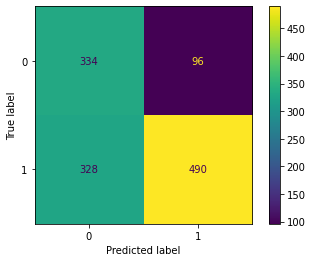

In [ ]:
plot_confusion_matrix(model1, model1_x_test, model1_y_test)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


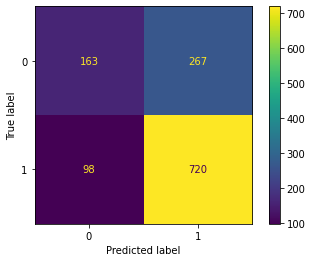

In [ ]:
plot_confusion_matrix(model2, model2_x_test, model2_y_test)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


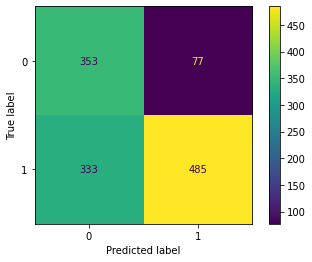

In [ ]:
plot_confusion_matrix(model3, model3_x_test, model3_y_test)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


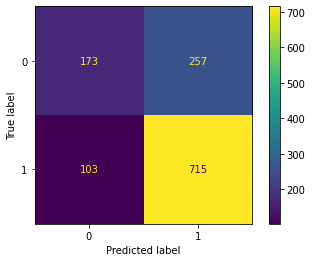

In [ ]:
plot_confusion_matrix(model4, model4_x_test, model4_y_test)

In [ ]:
#testing model on a recent fight
model3_x_test

,B_Reach_cms,R_Reach_cms,B_age,R_age,B_fighter,R_fighter,R_losses,B_losses
3368,182.88,190.50,35.0,35.0,Joshua Burkman,Patrick Cote,9,7
6125,180.34,177.80,26.0,23.0,Jason Dent,Roger Huerta,0,0
5542,180.34,195.58,34.0,29.0,Jason Brilz,Eliot Marshall,0,0
1439,200.66,200.66,29.0,35.0,Antonio Carlos Junior,Uriah Hall,7,4
5950,182.88,177.80,27.0,34.0,Paul Taylor,Marcus Davis,1,0
...,...,...,...,...,...,...,...,...
3019,180.34,180.34,25.0,29.0,Lukasz Sajewski,Gilbert Burns,1,1
741,172.72,172.72,29.0,35.0,Casey Kenney,Dominick Cruz,2,1
4991,182.88,185.42,29.0,28.0,George Roop,Hatsu Hioki,0,3
3984,170.18,180.34,23.0,30.0,Michinori Tanaka,Roland Delorme,2,0


In [ ]:
model3.predict([201 ,193, 31,38,'Jamahal Hill', 'Thiago Santos', 11, 1])

0

In [ ]:
model3.predict_proba([201 ,193, 31,38,'Jamahal Hill', 'Thiago Santos', 11, 1])

array([0.87984287, 0.12015713])

In [ ]:
model3.predict([173 ,179, 37,29,'Dominick Cruz', 'Marlon Vera', 7, 4])

1

In [ ]:
model3.predict_proba([173 ,179, 37,29,'Dominick Cruz', 'Marlon Vera', 7, 4])

array([0.48388538, 0.51611462])

In [ ]:
model2.predict_proba([173 ,179, 37,29,'Dominick Cruz', 'Marlon Vera', 7, 4])

array([0.26134688, 0.73865312])

## Cross Validating On Train Set All Models, we perform cv to check for generalized model performance across our 4 model assumptions/forms.

1. After 5 Cross Fold Validation, it is clear that assumpitons 2 and 4 did the best.
2. Because A4. had the most stable results we will use it as our main model to further optimize.



In [ ]:
#from catboost import Pool, cv

#cv_dataset = Pool(data=model3_x_train,
    #              label=model3_y_train,
     #             cat_features=cats)

#params = {
     #     "verbose": False,
     #     "scale_pos_weight": pos_scale}

from sklearn.model_selection import cross_validate

scoring = ['precision', 'recall', 'f1', 'accuracy']

In [ ]:
#getting the classifiers ready, we will need to create new classifiers since we are using CV

In [ ]:
scores1 = cross_validate(model1, X_res_model1,y_res_model1, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
scores2 = cross_validate(model2, X_res_model2, y_res_model2, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
scores3 = cross_validate(model3, model3_x_train, model3_y_train, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
scores4 = cross_validate(model4, model4_x_train, model4_y_train, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
scores1

{'fit_time': array([4.55028224, 4.56460166, 4.52839828, 4.59038281, 4.54551125]),
 'score_time': array([0.00823593, 0.00761676, 0.00793004, 0.00812411, 0.00782681]),
 'test_precision': array([0.68111455, 0.69491525, 0.665625  , 0.67465753, 0.6978852 ]),
 'test_recall': array([0.62857143, 0.58571429, 0.60683761, 0.56125356, 0.66      ]),
 'test_f1': array([0.653789  , 0.63565891, 0.63487332, 0.61275272, 0.6784141 ]),
 'test_accuracy': array([0.66761769, 0.66476462, 0.65049929, 0.64479315, 0.68714286])}

In [ ]:
scores2

{'fit_time': array([7.9552269 , 7.66910124, 7.65212035, 9.10584259, 7.73821378]),
 'score_time': array([0.01408601, 0.01274371, 0.01264906, 0.01269007, 0.01232719]),
 'test_precision': array([0.67710843, 0.64876957, 0.72243839, 0.9352518 , 0.92508711]),
 'test_recall': array([0.87267081, 0.90062112, 0.86490683, 0.80745342, 0.82581649]),
 'test_f1': array([0.76255088, 0.75422627, 0.78727915, 0.86666667, 0.87263763]),
 'test_accuracy': array([0.72826087, 0.70652174, 0.76630435, 0.87567988, 0.87956488])}

In [ ]:
scores3

{'fit_time': array([5.73106599, 5.72944593, 5.78777051, 5.84098268, 6.3632791 ]),
 'score_time': array([0.01033378, 0.01029372, 0.01094699, 0.01011729, 0.01191664]),
 'test_precision': array([0.82897862, 0.83014354, 0.82909931, 0.8488665 , 0.85678392]),
 'test_recall': array([0.54192547, 0.53881988, 0.55745342, 0.52329193, 0.53032659]),
 'test_f1': array([0.65539906, 0.65348399, 0.66666667, 0.64745437, 0.65513929]),
 'test_accuracy': array([0.63115578, 0.62977867, 0.638833  , 0.63078471, 0.638833  ])}

In [ ]:
scores4

{'fit_time': array([5.51372409, 5.50849557, 5.59427333, 6.06485891, 5.63997293]),
 'score_time': array([0.01126409, 0.01093006, 0.01081681, 0.01150179, 0.01115608]),
 'test_precision': array([0.71834625, 0.74390244, 0.72301691, 0.73655914, 0.74054054]),
 'test_recall': array([0.86335404, 0.85248447, 0.86335404, 0.85093168, 0.85225505]),
 'test_f1': array([0.7842031 , 0.79450072, 0.78697806, 0.78962536, 0.79248012]),
 'test_accuracy': array([0.69246231, 0.71428571, 0.6971831 , 0.70623742, 0.71126761])}

In [ ]:
X_res_model2.to_csv("X_resampled_train.csv")

pd.DataFrame(y_res_model2).to_csv('y_resampled_train.csv')

In [ ]:
y = pd.read_csv("y_resampled_train.csv", index_col = 0)

In [ ]:
y = y.rename(columns={'0': 'Winner'})

In [ ]:
y.to_csv("y_resampled_train.csv")

In [ ]:
#saving the best model 
import pickle

pickle.dump(model2, open('catBoost.pkl', 'wb'))

In [ ]:
#hyperparameter tuning 

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

model2_tuned = CatBoostClassifier(cat_features = cats)


grid_search_results = model2_tuned.grid_search(grid,
                                       X=X_res_model2,
                                       y=y_res_model2,
                                       plot=False)

#optimal parameters
#{'params': {'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [ ]:
model2_tuned = CatBoostClassifier(cat_features = cats, depth = 4, l2_leaf_reg = 9, learning_rate = 0.1)
model2_tuned.fit(X_res_model2, y_res_model2)

In [ ]:
pickle.dump(model2_tuned, open('catBoost_final.pkl', 'wb'))

In [ ]:
scores4 = cross_validate(model2_tuned, X_res_model2, y_res_model2, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
#fixing the issue with fighter names

In [ ]:
cats

In [ ]:
#X_res_model2 = X_res_model2.drop(columns = ['B_fighter', 'R_fighter'])

model2_tuned_v2 = CatBoostClassifier(depth = 4, l2_leaf_reg = 9, learning_rate = 0.1)


In [ ]:
#model2_x_test = model2_x_test.drop(columns = ['B_fighter', 'R_fighter'])

In [ ]:
model2_tuned_v2.fit(X_res_model2, y_res_model2)

In [ ]:
scores5 = cross_validate(model2_tuned_v2, X_res_model2, y_res_model2, cv=5,
                        scoring=scoring, return_train_score=False, verbose = False)

In [ ]:
scores5

In [ ]:
X_res_model2

,B_Reach_cms,R_Reach_cms,B_age,R_age,B_fighter,R_fighter,R_losses,B_losses
0,177.800000,180.340000,25.000000,27.000000,Olivier Aubin-Mercier,Chad Laprise,0,0
1,190.500000,180.340000,27.000000,35.000000,Khamzat Chimaev,Gilbert Burns,4,0
2,190.500000,172.720000,28.000000,30.000000,Yancy Medeiros,John Makdessi,4,4
3,182.880000,185.420000,32.000000,28.000000,Adriano Martins,Rustam Khabilov,1,1
4,180.340000,180.340000,31.000000,29.000000,Bobby Green,Erik Koch,4,4
...,...,...,...,...,...,...,...,...
6433,181.152438,162.560000,28.000000,25.599287,Ji Yeon Kim,Justine Kish,0,1
6434,160.020000,157.984777,30.198731,27.794924,Nina Nunes,Jessica Andrade,4,0
6435,172.682151,172.720000,30.985099,28.985099,Poliana Botelho,Talita Bernardo,0,1
6436,198.500553,203.961106,32.449472,34.149824,Derrick Lewis,Curtis Blaydes,2,3


In [ ]:
model2_tuned.predict_proba([188, 193, 30, 35, 'Leon Edwards', 'Kamaru Usman', 1, 3])

array([0.20592606, 0.79407394])

In [ ]:
model2_tuned.predict_proba([188, 193, 30, 35, 'Leon Edwards', 'Kamaru Usman', 1, 3])

In [ ]:
def make_prediction(classifier, B_Reach, R_Reach, B_age, R_age, B_fighter_name, R_fighter_name, R_Losses, B_Losses):
  prediction = classifier.predict_proba([B_Reach, R_Reach, B_age, R_age, B_fighter_name, R_fighter_name, R_Losses, B_Losses])
  response = f"This model predicts, {B_fighter_name} has a {round(prediction[0] * 100, 2)}% chance of winning and {R_fighter_name} has a {round(prediction[1] * 100, 2)}% chance of winning"
  return response 

In [ ]:
make_prediction(model2_tuned, 188, 193, 30, 35, 'Leon Edwards', 'Kamaru Usman', 1, 3)

'This model predicts, Leon Edwards has a 20.59% chance of winning and Kamaru Usman has a 79.41% chance of winning'

In [ ]:
make_prediction(model2_tuned, 196, 183, 37, 31, 'Luke Rockhold', 'Paulo Costa', 2, 5)

'This model predicts, Luke Rockhold has a 10.68% chance of winning and Paulo Costa has a 89.32% chance of winning'

In [ ]:
make_prediction(model2_tuned, 173, 178, 31, 35, 'Merab Dvalishvili', 'Jose Aldo', 7, 4)

'This model predicts, Merab Dvalishvili has a 65.92% chance of winning and Jose Aldo has a 34.08% chance of winning'